## Лаб.06

### Применение предобученных ИНС для классификации изображений

---

#### Задание:
Познакомиться с известными архитектурами сверточных ИНС для распознавания изображений. Научиться использовать предобученные ИНС для распознавания собственных изображений.

**Порядок выполнения работы:**
1. Импортируйте модель `VGG16` из модуля `applications`
2. Создайте модель, обученную на наборе данных ImageNet (`weights = 'imagenet'`).
3. Выведите информацию об архитектуре и количестве параметров модели. Изучите архитектуру сети.
4. Примените обученную модель для распознавания произвольного изображения:
  * загрузите в Colab файл изображения, которое нужно распознать (любое изображение по собственному выбору)<br>`from google.colab import files`<br>`files.upload()`
  * загрузите изображение в программу, используя инструментарий модуля preprocessing, с указанием целевого размера изображения 224 на 224 пикселя (модель VGG16 работает с изображениями такого размера):<br>`from tensorflow.keras.preprocessing import image`<br>`img = image.load_img(<имя файла>, target_size=(224, 224))`
  * выведите полученное изображение;
  * преобразуйте картинку в массив и сформируйте массив из одного элемента;
  * для предварительной подготовки изображения перед подачей его на вход модели `VGG16` примените метод `preprocess_input()` из модуля `applications`:<br>`from tensorflow.keras.applications.vgg16 import preprocess_input`<br>`x = preprocess_input(x)`
  * подайте обработанное изображение на вход обученной модели и получите массив предсказанных моделью вероятностей принадлежности классам;
  * для получения меток наиболее вероятных классов примените метод `decode_predictions()`
5. Проанализируйте результаты распознавания, оцените качество работы сети.
6. Загрузите и примените для распознавания другие известные архитектуры (Inception, ResNet, …). Обратите внимание на размерность изображений, которую необходимо использовать при подаче изображения на вход модели (размерность, на которой была обучена та или иная модель).<br><u>Указания</u>. Разные архитектуры CNN требуют применения различных процедур предобработки данных, которые необходимо импортировать из соответствующих классов. В частности:<br><br>при использовании архитектуры `ResNet50` можно использовать тот же метод `preprocess_input()`, что и для `VGG16`;<br><br>при использовании архитектуры `VGG19` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.vgg19`;<br><br>при использовании архитектуры `InceptionV3` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.inception_v3`;<br><br>при использовании архитектуры `Xception` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.xception`;<br><br>при использовании архитектуры `DenseNet201` для подготовки данных надо использовать следующий код<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`from tensorflow.keras.layers.experimental import preprocessing`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`layer = preprocessing.Normalization()`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`layer.adapt(x)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`x = layer(x)`<br><br>где x – данные для распознавания.

---

1. Импортируйте модель `VGG16` из модуля `applications`

In [ ]:
# import the VGG16 model from the applications module

from keras.applications import VGG16

What are the challenges Of VGG16:
*   It is very slow to train (the original VGG model was trained on the Nvidia Titan GPU for 2–3 weeks).
*   The size of VGG-16 trained imageNet weights is 528 MB. So, it takes quite a lot of disk space and bandwidth that makes it inefficient.

---

2. Создайте модель, обученную на наборе данных ImageNet (`weights = 'imagenet'`).

In [ ]:
# create a model trained on the ImageNet dataset (weights = 'imagenet')

model = VGG16(weights='imagenet')

# Why weights only?
# https://stackoverflow.com/questions/62739893/why-are-keras-models-instantiated-with-imagenet-weights-only

553467096/553467096 [==============================] - 5s 0us/step


---

3. Выведите информацию об архитектуре и количестве параметров модели. Изучите архитектуру сети.

In [ ]:
# display information about the architecture and the number of model parameters

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

---

4. Примените обученную модель для распознавания произвольного изображения:
  * загрузите в Colab файл изображения, которое нужно распознать (любое изображение по собственному выбору)<br>`from google.colab import files`<br>`files.upload()`
  * загрузите изображение в программу, используя инструментарий модуля preprocessing, с указанием целевого размера изображения 224 на 224 пикселя (модель VGG16 работает с изображениями такого размера):<br>`from tensorflow.keras.preprocessing import image`<br>`img = image.load_img(<имя файла>, target_size=(224, 224))`
  * выведите полученное изображение;
  * преобразуйте картинку в массив и сформируйте массив из одного элемента;
  * для предварительной подготовки изображения перед подачей его на вход модели `VGG16` примените метод `preprocess_input()` из модуля `applications`:<br>`from tensorflow.keras.applications.vgg16 import preprocess_input`<br>`x = preprocess_input(x)`
  * подайте обработанное изображение на вход обученной модели и получите массив предсказанных моделью вероятностей принадлежности классам;
  * для получения меток наиболее вероятных классов примените метод `decode_predictions()`

In [ ]:
# apply the trained model to recognize an arbitrary image:

from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
from google.colab import files
img = files.upload()

Saving photo.jpg to photo.jpg


<img src="lab_06_photo.jpg" width="250">

In [ ]:
img = image.load_img('photo.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('\nPredicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step

Predicted: [('n02096437', 'Dandie_Dinmont', 0.48202673), ('n02094114', 'Norfolk_terrier', 0.19444425), ('n02098413', 'Lhasa', 0.14441782)]


---

5. Проанализируйте результаты распознавания, оцените качество работы сети.

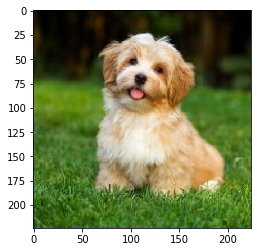

In [ ]:
# display the image

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

---

6. Загрузите и примените для распознавания другие известные архитектуры (Inception, ResNet, …). Обратите внимание на размерность изображений, которую необходимо использовать при подаче изображения на вход модели (размерность, на которой была обучена та или иная модель).<br><u>Указания</u>. Разные архитектуры CNN требуют применения различных процедур предобработки данных, которые необходимо импортировать из соответствующих классов. В частности:<br><br>при использовании архитектуры `ResNet50` можно использовать тот же метод `preprocess_input()`, что и для `VGG16`;<br><br>при использовании архитектуры `VGG19` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.vgg19`;<br><br>при использовании архитектуры `InceptionV3` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.inception_v3`;<br><br>при использовании архитектуры `Xception` нужно импортировать метод `preprocess_input()` из `tensorflow.keras.applications.xception`;<br><br>при использовании архитектуры `DenseNet201` для подготовки данных надо использовать следующий код<br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`from tensorflow.keras.layers.experimental import preprocessing`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`layer = preprocessing.Normalization()`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`layer.adapt(x)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`x = layer(x)`<br><br>где x – данные для распознавания.

In [ ]:
# download and apply other known architectures for recognition (InceptionV3, VGG19, Xception, DenseNet201)

# ================ InceptionV3 ================
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

model = InceptionV3(weights='imagenet')
img_path = 'photo.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('\nPredicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 2s 2s/step

Predicted: [('n02098413', 'Lhasa', 0.63447875), ('n02086240', 'Shih-Tzu', 0.08591237), ('n02097474', 'Tibetan_terrier', 0.043143094)]


In [ ]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions

# ================ VGG19 ================

model = VGG19(weights='imagenet')
img_path = 'photo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('\nPredicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 832ms/step

Predicted: [('n02096437', 'Dandie_Dinmont', 0.26222226), ('n02098413', 'Lhasa', 0.22177352), ('n02094114', 'Norfolk_terrier', 0.18396878)]


In [ ]:
from keras.applications import Xception
from keras.applications.xception import preprocess_input, decode_predictions

# ================ Xception ================

model = Xception(weights='imagenet')
img_path = 'photo.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('\nPredicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step

Predicted: [('n02098413', 'Lhasa', 0.5598982), ('n02097474', 'Tibetan_terrier', 0.072427705), ('n02086240', 'Shih-Tzu', 0.039349)]


In [ ]:
from keras.applications import DenseNet201
from tensorflow.keras.layers.experimental import preprocessing

# ================ DenseNet201 ================

model = DenseNet201(weights='imagenet')
img_path = 'photo.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
layer = preprocessing.Normalization()

layer.adapt(x)

x = layer(x)

preds = model.predict(x)
print('\nPredicted:', decode_predictions(preds, top=3)[0])

82524592/82524592 [==============================] - 1s 0us/step


1/1 [==============================] - 4s 4s/step

Predicted: [('n02098413', 'Lhasa', 0.37176532), ('n02096437', 'Dandie_Dinmont', 0.18800896), ('n02097474', 'Tibetan_terrier', 0.16350102)]
